In [29]:
import pandas as pd
import matplotlib.pyplot as plt

The original essential genes dataset had 28166 rows but only 26791 had available sequences.

In [30]:
deg_dataset = pd.read_csv("datasets/essential_genes.csv", sep=';')
print(deg_dataset.head())
print(deg_dataset.shape)

# ensembl_dataset = pd.read_csv("datasets/ensembl.csv", sep=',')
# print(ensembl_dataset.head())
# print(ensembl_dataset.shape)

       id1          id2    id3   id4 id5 id6  \
0  DEG2006  DEG20060001   GBAP  GI:-   -   -   
1  DEG2006  DEG20060002  MTHFR  GI:-   -   -   
2  DEG2006  DEG20060003   ECE1  GI:-   -   -   
3  DEG2006  DEG20060004  HSPG2  GI:-   -   -   
4  DEG2006  DEG20060005  TGIF1  GI:-   -   -   

                                   id7           id8       id9         id10  \
0                     Beta-glucosidase  Homo sapiens      1q22  Rich medium   
1  Methylenetetrahydrofolate reductase  Homo sapiens   1p36.22  Rich medium   
2       Endothelin converting enzyme 1  Homo sapiens   1p36.12  Rich medium   
3                             Perlecan  Homo sapiens   1p36.12  Rich medium   
4                TG-interacting factor  Homo sapiens  18p11.31  Rich medium   

  id11 id12 id13        id14  \
0    -    -    -   HGNC:4178   
1    -    -    -   HGNC:7436   
2    -    -    -   HGNC:3146   
3    -    -    -   HGNC:5273   
4    -    -    -  HGNC:11776   

                                           

Creating positive essential genes dataset. Each sequence needs to be in at least 5 datasets.

In [31]:
# for each sequence, get all the datasets that contain it
d = {}
for _, row in deg_dataset.iterrows():
    if(row["sequence"] in d):
        d[row["sequence"]].append((row["id1"], row["id4"]))
    else:
        d[row["sequence"]] = [(row["id1"], row["id4"])]


# get a list of sequences that are in more than 5 datasets
essential_sequences = []
for key, val in d.items():
    if(len(val) >= 5):
        essential_sequences.append((val[0][1], key))
        
# create dataframe with essential sequences
eg_positive = pd.DataFrame(essential_sequences, columns=["id", "sequence"])
print(eg_positive.head())
print(eg_positive.shape)

# write to csv
eg_positive.to_csv("datasets/essential_genes_positive.csv", index=False)

     id                                           sequence
0  GI:-  ATGGTGCTGTCCCAGAGACAACGAGATGAACTAAATCGAGCTATAG...
1  GI:-  ATGGCTGCAGCTTCATATGATCAGTTGTTAAAGCAAGTTGAGGCAC...
2  GI:-  ATGAGCCGCCTGCTCTGGAGGAAGGTGGCCGGCGCCACCGTCGGGC...
3  GI:-  ATGCAGAGCTGGAGTCGTGTGTACTGCTCCTTGGCCAAGAGAGGCC...
4  GI:-  ATGGTTGGCTATGACCCCAAACCAGATGGCAGGAATAACACCAAGT...
(2010, 2)


At this point, we have 3 different datasets:
* deg_dataset -> dataset with all genes from the DEG dataset (26791, 15)
* ensembl_dataset -> dataset with all genes from the Ensembl dataset (22824, 2)
* eg_positive -> positive dataset with essential genes (genes contained in at least 5 datasets) (2010, 1)

Now we need to remove from the Ensembl dataset the sequences that are in the essential genes dataset.

In [32]:
unique_deg_sequences = set(deg_dataset["sequence"])
print("unique deg sequences:", len(unique_deg_sequences))

ensembl_sequences = set(ensembl_dataset["sequence"])
print("len(ensembl_sequences):", len(ensembl_sequences))

unique deg sequences: 6890


NameError: name 'ensembl_dataset' is not defined

In [ ]:
def create_non_essential_sequence(unique_deg_sequences, ensembl_sequences):
    non_essential_sequences = set()
    for index, big_seq in enumerate(ensembl_sequences):
        for small_seq in unique_deg_sequences:
            if(small_seq not in big_seq):
                non_essential_sequences.add(big_seq)
        if(index % 10 == 0):
            print(index, "/", len(ensembl_sequences))
    return non_essential_sequences

In [ ]:
non_essential_sequences = create_non_essential_sequence(unique_deg_sequences, ensembl_sequences)
print("len(non_essential_sequences):", len(non_essential_sequences))

0 / 22059
10 / 22059
20 / 22059
30 / 22059
40 / 22059
50 / 22059
60 / 22059
70 / 22059
80 / 22059
90 / 22059
100 / 22059
110 / 22059
120 / 22059
130 / 22059
140 / 22059
150 / 22059
160 / 22059
170 / 22059
180 / 22059
190 / 22059
200 / 22059
210 / 22059
220 / 22059
230 / 22059
240 / 22059
250 / 22059
260 / 22059
270 / 22059
280 / 22059
290 / 22059
300 / 22059
310 / 22059
320 / 22059
330 / 22059
340 / 22059
350 / 22059
360 / 22059
370 / 22059
380 / 22059
390 / 22059
400 / 22059
410 / 22059
420 / 22059
430 / 22059
440 / 22059
450 / 22059
460 / 22059
470 / 22059
480 / 22059
490 / 22059
500 / 22059
510 / 22059
520 / 22059
530 / 22059
540 / 22059
550 / 22059
560 / 22059
570 / 22059
580 / 22059
590 / 22059
600 / 22059
610 / 22059
620 / 22059
630 / 22059
640 / 22059
650 / 22059
660 / 22059
670 / 22059
680 / 22059
690 / 22059
700 / 22059
710 / 22059
720 / 22059
730 / 22059
740 / 22059
750 / 22059
760 / 22059
770 / 22059
780 / 22059
790 / 22059
800 / 22059
810 / 22059
820 / 22059
830 / 22059
840

Calculating length of each sequence and cleaning up the data

In [ ]:
# calculate length of each gene (last row)
deg_dataset["length"] = deg_dataset["sequence"].str.len()
ensembl_dataset["length"] = ensembl_dataset["sequence"].str.len()

In [ ]:
deg_dataset = deg_dataset[deg_dataset["length"] <= 27000]
print(deg_dataset.shape)

ensembl_dataset = ensembl_dataset[ensembl_dataset["length"] <= 100000]
print(ensembl_dataset.shape)

(26790, 16)
(19046, 3)


Statistics about the data, including:
* Total sequences
* Top 5 longest and shortest sequences
* Average length of sequences
* Top 5 most and least common sequence length

In [ ]:
def stats(dataset):
    dataset["length"].hist(bins=100)
    plt.show()

    print("-" * 40)

    print("Total sequences:", dataset.shape[0])

    print("-" * 40)

    print("Top 5 longest sequences:")
    print("id       length")
    print(dataset["length"].nlargest(5).to_string())

    print("-" * 40)

    print("Top 5 shortest sequences:")
    print("id       length")
    print(dataset["length"].nsmallest(5).to_string())

    print("-" * 40)

    average_length = dataset["length"].mean()
    print("Average length:", average_length)

    print("-" * 40)

    print("Top 5 most common lengths:")
    print("length   count")
    print(dataset["length"].value_counts().nlargest(5).to_string())
    
    print("-" * 40)

    print("Top 5 least common lengths:")
    print("length   count")
    print(dataset["length"].value_counts().nsmallest(5).to_string())

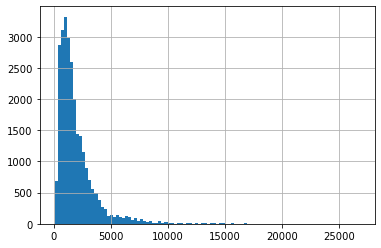

----------------------------------------
Total sequences: 26790
----------------------------------------
Top 5 longest sequences:
id       length
19660    26778
1223     26394
2298     25578
1661     23253
3222     23253
----------------------------------------
Top 5 shortest sequences:
id       length
5943      78
8094      78
25617    135
4647     144
6718     144
----------------------------------------
Average length: 1951.3291899962674
----------------------------------------
Top 5 most common lengths:
length   count
1041    87
1083    87
1314    85
555     80
1005    79
----------------------------------------
Top 5 least common lengths:
length   count
3240    1
3417    1
5751    1
6054    1
3660    1
****************************************************************************************************


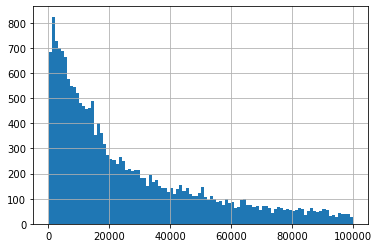

----------------------------------------
Total sequences: 19046
----------------------------------------
Top 5 longest sequences:
id       length
20208    99989
450      99960
12089    99954
14019    99917
15700    99892
----------------------------------------
Top 5 shortest sequences:
id       length
21861    39
22277    51
22035    54
22603    57
22653    63
----------------------------------------
Average length: 25772.153575553923
----------------------------------------
Top 5 most common lengths:
length   count
1272    31
939     26
1593    24
930     21
936     16
----------------------------------------
Top 5 least common lengths:
length   count
95577    1
2179     1
5296     1
5921     1
35466    1


In [ ]:
stats(deg_dataset)
print("*" * 100)
stats(ensembl_dataset)

In [ ]:
# average_length = int(average_length)

# cut sequences to the average length
# seqs_dataset = seqs_dataset.str.slice(0, average_length)

# fill with "N" the sequences that are shorter than average length
# seqs_dataset = seqs_dataset.str.pad(average_length, side='right', fillchar='N')